In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tensorflow as tf
from keras_preprocessing.image.image_data_generator import ImageDataGenerator
from tensorflow.keras import Model,Sequential
from tensorflow.keras import layers
from keras import models
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import cv2
import shutil
import kagglehub

In [ ]:
print(tf.__file__)


/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py


# Downloading Dataset from kaggle
`https://www.kaggle.com/datasets/zhangweiled/lidcidri/data`

In [ ]:

# Download latest version
path = kagglehub.dataset_download("kmader/lungnodemalignancy")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lungnodemalignancy


In [ ]:
!cp -r "/kaggle/input/lungnodemalignancy" /content/

In [ ]:
import h5py

f = h5py.File('/content/lungnodemalignancy/all_patches.hdf5','r')
print(list(f.keys()))

ct_slices = f['ct_slices']
slice_class = f['slice_class']

ct_slices = np.array(ct_slices)
slice_class = np.array(slice_class)

print(ct_slices.shape)
print(slice_class.shape)

['ct_slices', 'slice_class']
(6691, 64, 64)
(6691, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

ct_slices = ct_slices.reshape(6691,64,64,1)

X_train, X_test, y_train, y_test = train_test_split(ct_slices, slice_class, test_size=0.33, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print(X_train.shape)
print(y_train.shape)

(4482, 64, 64, 1)
(4482, 2)


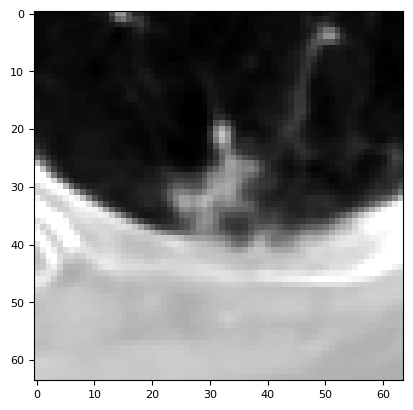

In [ ]:
import pylab
ct_slices = np.clip(ct_slices, -1000,320)

pylab.imshow(ct_slices[5], cmap=pylab.cm.gray)
pylab.show()

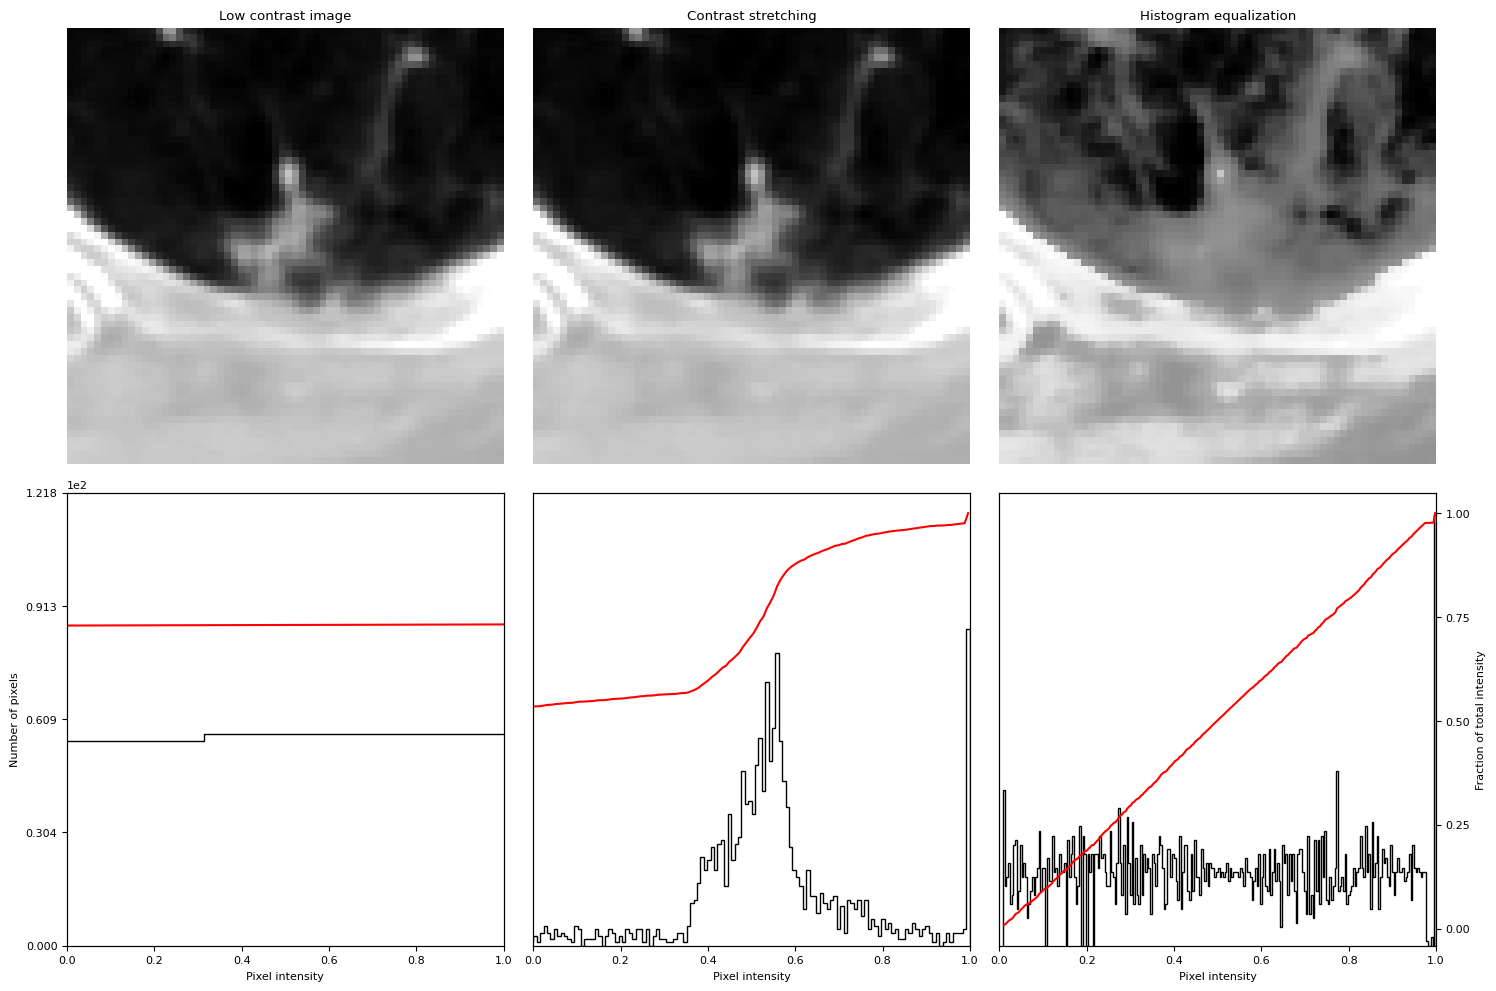

In [ ]:
from skimage import data, img_as_float
from skimage import exposure

# Lets try augmenting a cifar10 image using these techniques
from skimage import data, img_as_float
from skimage import exposure

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf
# Load an example image from cifar10 dataset
#img = images[0]

# Set font size for images
matplotlib.rcParams['font.size'] = 8

img = ct_slices[5]
# img = ((img-np.min(img))/(np.max(img)-np.min(img)))

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Histogram Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
# img_adapteq = exposure.equalize_adapthist(img)

#### Everything below here is just to create the plot/graphs ####

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
# ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

Build CNN with Keras



In [ ]:
from keras.applications.resnet50 import ResNet50
#from keras.applications import MobileNetV2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import backend as K
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
import torch.nn.functional as F
import numpy as np
import skimage.transform
import keras

#conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(64,64,1)))
# model.add(Dropout(0.2))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MyCustomLayer(32,use_bias = False))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# # model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# # model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
#kernel_regularizer=l2(1e-2)
# model.fit(x_train, y_train,
#           batch_size=64,
#           epochs=10,
#           verbose=1,
#           validation_data=(x_test, y_test))
history = model.fit(
        X_train,y_train,
        batch_size=100,
        epochs=100,
        validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.5421 - loss: 8.0195 - val_accuracy: 0.6148 - val_loss: 0.6627
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6416 - loss: 0.6526 - val_accuracy: 0.6338 - val_loss: 0.6411
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6545 - loss: 0.6290 - val_accuracy: 0.6419 - val_loss: 0.6266
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6716 - loss: 0.6046 - val_accuracy: 0.6410 - val_loss: 0.6552
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6957 - loss: 0.5880 - val_accuracy: 0.7048 - val_loss: 0.5909
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7019 - loss: 0.5797 - val_accuracy: 0.7112 - val_loss: 0.5761
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7054 - loss: 0.5616 - val_accuracy: 0.7008 - val_loss: 0.5673
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7418 - loss: 0.5199 - val_accuracy:

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195,368 (763.16 KB)

 Trainable params: 65,122 (254.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130,246 (508.78 KB)

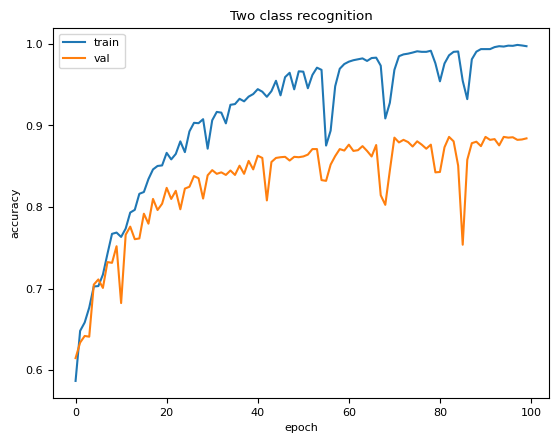

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Two class recognition')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Create CAM(heating map)



In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def normalization(image):
    return (image - image.min())/(image.max() - image.min())

def gray_to_redblue(image):
    R,G,B = image[:,:,0], image[:,:,1], image[:,:,2]
    #grey = sum(pixel) // len(pixel)
    redvalue = 1 - R  # "darkness"
    bluevalue = B  # "brightness"
    image[:,:,0] = B
    image[:,:,1] = 0
    image[:,:,2] = 1-R
    return image# + alpha

In [ ]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1358
           1       0.86      0.84      0.85       851

    accuracy                           0.88      2209
   macro avg       0.88      0.88      0.88      2209
weighted avg       0.88      0.88      0.88      2209



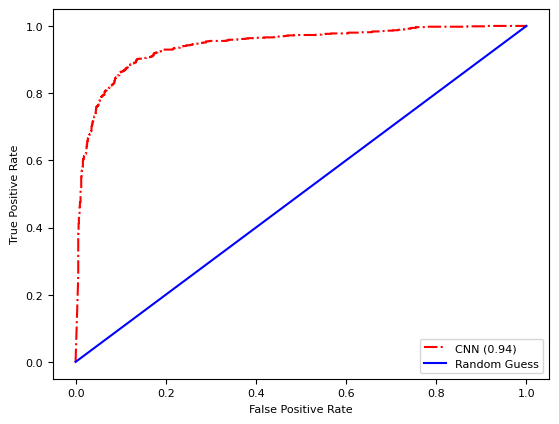

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(np.argmax(y_test, 1), y_pred_proba[:,1])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5457 - loss: 9.7562 
Epoch 1: val_accuracy improved from -inf to 0.61566, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.5460 - loss: 9.6200 - val_accuracy: 0.6157 - val_loss: 0.6635
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6356 - loss: 0.6535
Epoch 2: val_accuracy improved from 0.61566 to 0.62381, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.6356 - loss: 0.6535 - val_accuracy: 0.6238 - val_loss: 0.6529
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6416 - loss: 0.6447
Epoch 3: val_accuracy improved from 0.62381 to 0.63739, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6417 - loss: 0.6446 - val_accuracy: 0.6374 - val_loss: 0.6294
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6685 - loss: 0.6143
Epoch 4: val_accuracy improved from 0.63739 to 0.66274, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6684 - loss: 0.6143 - val_accuracy: 0.6627 - val_loss: 0.6087
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6920 - loss: 0.5879
Epoch 5: val_accuracy improved from 0.66274 to 0.68040, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6921 - loss: 0.5878 - val_accuracy: 0.6804 - val_loss: 0.5890
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7004 - loss: 0.5753
Epoch 6: val_accuracy did not improve from 0.68040
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7005 - loss: 0.5753 - val_accuracy: 0.6659 - val_loss: 0.6498
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7115 - loss: 0.5621
Epoch 7: val_accuracy improved from 0.68040 to 0.73517, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7117 - loss: 0.5618 - val_accuracy: 0.7352 - val_loss: 0.5359
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7533 - loss: 0.5207
Epoch 8: val_accuracy improved from 0.73517 to 0.73834, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7534 - loss: 0.5206 - val_accuracy: 0.7383 - val_loss: 0.5378
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7662 - loss: 0.5019
Epoch 9: val_accuracy improved from 0.73834 to 0.74785, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7662 - loss: 0.5018 - val_accuracy: 0.7478 - val_loss: 0.5162
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7851 - loss: 0.4687
Epoch 10: val_accuracy improved from 0.74785 to 0.77184, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7850 - loss: 0.4688 - val_accuracy: 0.7718 - val_loss: 0.4832
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7940 - loss: 0.4398
Epoch 11: val_accuracy did not improve from 0.77184
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7942 - loss: 0.4396 - val_accuracy: 0.7651 - val_loss: 0.4784
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8060 - loss: 0.4159
Epoch 12: val_accuracy did not improve from 0.77184
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8059 - loss: 0.4162 - val_accuracy: 0.7682 - val_loss: 0.5016
Epoch 13/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7884 - loss: 0.4615
Epoch 13: val_accuracy improved from 0.77184 to 0.78452, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7884 - loss: 0.4613 - val_accuracy: 0.7845 - val_loss: 0.4541
Epoch 14/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8266 - loss: 0.3917
Epoch 14: val_accuracy improved from 0.78452 to 0.79402, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8266 - loss: 0.3915 - val_accuracy: 0.7940 - val_loss: 0.4525
Epoch 15/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8485 - loss: 0.3506
Epoch 15: val_accuracy improved from 0.79402 to 0.80036, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8484 - loss: 0.3509 - val_accuracy: 0.8004 - val_loss: 0.4341
Epoch 16/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8507 - loss: 0.3457
Epoch 16: val_accuracy improved from 0.80036 to 0.80579, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8508 - loss: 0.3456 - val_accuracy: 0.8058 - val_loss: 0.4442
Epoch 17/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8649 - loss: 0.3082
Epoch 17: val_accuracy improved from 0.80579 to 0.83703, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8649 - loss: 0.3083 - val_accuracy: 0.8370 - val_loss: 0.3698
Epoch 18/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8825 - loss: 0.2954
Epoch 18: val_accuracy did not improve from 0.83703
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8822 - loss: 0.2955 - val_accuracy: 0.7804 - val_loss: 0.5526
Epoch 19/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8544 - loss: 0.3310
Epoch 19: val_accuracy improved from 0.83703 to 0.85242, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8547 - loss: 0.3305 - val_accuracy: 0.8524 - val_loss: 0.3716
Epoch 20/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8699 - loss: 0.2971
Epoch 20: val_accuracy did not improve from 0.85242
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8699 - loss: 0.2971 - val_accuracy: 0.8397 - val_loss: 0.3816
Epoch 21/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8791 - loss: 0.2825
Epoch 21: val_accuracy did not improve from 0.85242
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8791 - loss: 0.2825 - val_accuracy: 0.8130 - val_loss: 0.4332
Epoch 22/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8939 - loss: 0.2624
Epoch 22: val_accuracy improved from 0.85242 to 0.86781, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8940 - loss: 0.2620 - val_accuracy: 0.8678 - val_loss: 0.3381
Epoch 23/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8971 - loss: 0.2460
Epoch 23: val_accuracy did not improve from 0.86781
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8969 - loss: 0.2462 - val_accuracy: 0.8456 - val_loss: 0.3640
Epoch 24/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8901 - loss: 0.2499
Epoch 24: val_accuracy did not improve from 0.86781
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8902 - loss: 0.2497 - val_accuracy: 0.8642 - val_loss: 0.3464
Epoch 25/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9138 - loss: 0.2077
Epoch 25: val_accuracy improved from 0.86781 to 0.86872, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9139 - loss: 0.2075 - val_accuracy: 0.8687 - val_loss: 0.3579
Epoch 26/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9134 - loss: 0.2089
Epoch 26: val_accuracy did not improve from 0.86872
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9135 - loss: 0.2088 - val_accuracy: 0.8416 - val_loss: 0.3926
Epoch 27/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9347 - loss: 0.1714
Epoch 27: val_accuracy improved from 0.86872 to 0.87144, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9346 - loss: 0.1713 - val_accuracy: 0.8714 - val_loss: 0.3669
Epoch 28/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9400 - loss: 0.1524
Epoch 28: val_accuracy improved from 0.87144 to 0.87189, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9399 - loss: 0.1526 - val_accuracy: 0.8719 - val_loss: 0.3400
Epoch 29/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9218 - loss: 0.1839
Epoch 29: val_accuracy did not improve from 0.87189
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9216 - loss: 0.1844 - val_accuracy: 0.8696 - val_loss: 0.3574
Epoch 30/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9223 - loss: 0.1912
Epoch 30: val_accuracy did not improve from 0.87189
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9223 - loss: 0.1912 - val_accuracy: 0.8438 - val_loss: 0.4189
Epoch 31/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9390 - loss: 0.1563
Epoch 31: val_accuracy improved from 0.87189 to 0.87370, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9392 - loss: 0.1560 - val_accuracy: 0.8737 - val_loss: 0.3758
Epoch 32/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9488 - loss: 0.1235
Epoch 32: val_accuracy improved from 0.87370 to 0.87732, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9487 - loss: 0.1237 - val_accuracy: 0.8773 - val_loss: 0.3765
Epoch 33/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9536 - loss: 0.1138
Epoch 33: val_accuracy did not improve from 0.87732
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9535 - loss: 0.1141 - val_accuracy: 0.8583 - val_loss: 0.4259
Epoch 34/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9422 - loss: 0.1483
Epoch 34: val_accuracy improved from 0.87732 to 0.88230, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9422 - loss: 0.1483 - val_accuracy: 0.8823 - val_loss: 0.3438
Epoch 35/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9624 - loss: 0.0983
Epoch 35: val_accuracy did not improve from 0.88230
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9624 - loss: 0.0983 - val_accuracy: 0.8637 - val_loss: 0.4924
Epoch 36/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9608 - loss: 0.1008
Epoch 36: val_accuracy did not improve from 0.88230
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9607 - loss: 0.1009 - val_accuracy: 0.8615 - val_loss: 0.4660
Epoch 37/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9467 - loss: 0.1373
Epoch 37: val_accuracy did not improve from 0.88230
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9467 - loss: 0.1374 - val_accuracy: 0.8710 - val_loss: 0.3604
Epoch 38/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9633 - loss: 0.0969
Epoch 38: val_accuracy improved 

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9633 - loss: 0.0970 - val_accuracy: 0.8855 - val_loss: 0.4342
Epoch 39/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9468 - loss: 0.1289
Epoch 39: val_accuracy did not improve from 0.88547
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9467 - loss: 0.1291 - val_accuracy: 0.8357 - val_loss: 0.4917
Epoch 40/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9520 - loss: 0.1193
Epoch 40: val_accuracy did not improve from 0.88547
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9522 - loss: 0.1190 - val_accuracy: 0.8828 - val_loss: 0.4788
Epoch 41/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9642 - loss: 0.0837
Epoch 41: val_accuracy improved from 0.88547 to 0.90358, saving model to best_model.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9643 - loss: 0.0834 - val_accuracy: 0.9036 - val_loss: 0.3870
Epoch 42/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9792 - loss: 0.0539
Epoch 42: val_accuracy did not improve from 0.90358
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9792 - loss: 0.0540 - val_accuracy: 0.8823 - val_loss: 0.4740
Epoch 43/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9646 - loss: 0.0858
Epoch 43: val_accuracy did not improve from 0.90358
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9645 - loss: 0.0861 - val_accuracy: 0.8823 - val_loss: 0.4611
Epoch 44/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9527 - loss: 0.1106
Epoch 44: val_accuracy did not improve from 0.90358
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9528 - loss: 0.1104 - val_accuracy: 0.8674 - val_loss: 0.5365
Epoch 45/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9517 - loss: 0.1159
Epoch 45: val_accuracy did not i

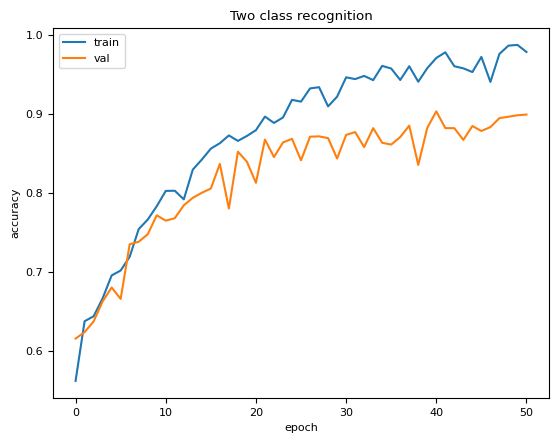

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1358
           1       0.90      0.85      0.87       851

    accuracy                           0.90      2209
   macro avg       0.90      0.89      0.90      2209
weighted avg       0.90      0.90      0.90      2209



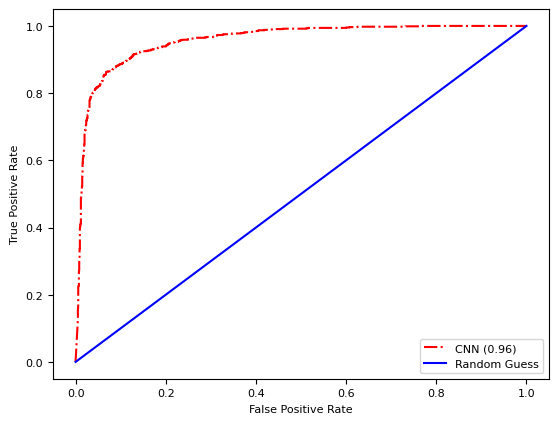

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the model (same as your original)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64,64,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

# Callbacks to save best model and stop early if no improvement
checkpoint = ModelCheckpoint(
    'best_model.h5',             # Filepath to save the model
    monitor='val_accuracy',      # Metric to monitor
    save_best_only=True,         # Only save if improved
    mode='max',                  # Maximize val_accuracy
    verbose=1                    # Print a message when saving
)

early_stop = EarlyStopping(
    monitor='val_accuracy',      # Metric to monitor
    patience=10,                # Stop after 10 epochs without improvement
    restore_best_weights=True    # Restore the best weights when stopping
)

# Train with callbacks
history = model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop]  # Add callbacks here
)

# Rest of your original code (plots, evaluation, etc.) remains the same
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Two class recognition')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1), y_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(np.argmax(y_test, 1), y_pred_proba[:,1])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()